# Plateforme et language de programmation : Mini-projet final 
Mathieu Chalvidal 

# Consigne

Mini projet d'analyse de données massives à l'image du cas CDiscount : analyse comparative de la chaîne no big data versus la chaîne avec Spark. Le jeu de données est à votre choix. Il faut qu'il soit suffisamment volumineux.

## Use case presentation : Building efficient relevancy index for the Seatle Library

#### Content

The dataset comes from Kaggle Dataset bank. It consist in the **scraping of 100K Coursera course reviews and notations**. The goal of this use case is to perform **a set of classification models for predicting reviews associated to a written critic** & **understand what is appreciated amongst users**. This can be seen as a sentiment analysis problem where the critic is potentially holding information about the grade assigned to the course. (For a 5-star rating, the review was labelled as Very Positive, Positive for 4-star, Neutral for 3-star, Negative for 2-star, and Very Negative for 1-star.) 

The models we are introducing: 

- **Tf_IDF  & Word2Vec n_grams embedding**
- **Logistic regression** 


# Résultats 

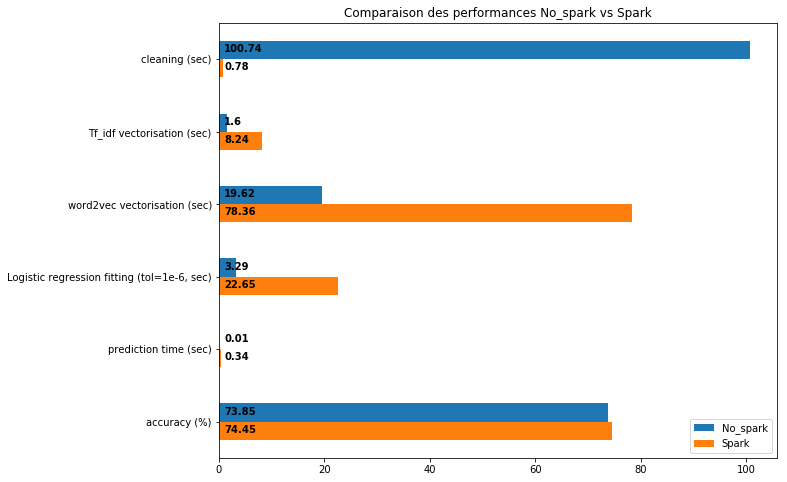

In [1]:
import os
from IPython.display import Image
os.chdir('/Users/chalvidalm/Documents/3A OMA/Plateforme et Langage de Programmation/Etude_de_cas')
Image(filename='performance temporelle.png')

# I ) Traitement au moyen des librairies Pandas et Scikit-learn

#### Imports

In [2]:
import numpy as np
import pandas as pd
import nltk 
import time
import os
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
import re

In [3]:
os.chdir('/Users/chalvidalm/Documents/3A OMA/Plateforme et Langage de Programmation/Etude_de_cas/titlebased-semantic-subject-indexing')
Data = pd.read_csv('pubmed.csv', nrows = 1000000)
Data.head(10)

,id,title,labels,fold
0,11882252,"CFEOM1, the classic familial form of congenita...",Female\tFibrosis\tGenetic Linkage\tGenetic Var...,3
1,11882251,An algorithm and program for finding sequence ...,Algorithms\tComputational Biology\tCupriavidus...,0
2,11922865,Nerve growth factor selectively regulates expr...,Animals\tGene Expression Profiling\tGene Expre...,0
3,11879527,The use of breast conserving surgery: linking ...,"Age Factors\tAged\tAged, 80 and over\tBreast N...",0
4,11914147,Assessment of the infectious diseases surveill...,Armenia\tCommunicable Disease Control\tDisease...,7
5,11884248,Reporting of measures of accuracy in systemati...,Bias (Epidemiology)\tClinical Laboratory Techn...,1
6,11914137,Markers for early detection of cancer: statist...,Bias (Epidemiology)\tBiomarkers\tCase-Control ...,9
7,11918830,A theoretical model for estimating the margina...,Animals\tCell Movement\tEpinephrine\tLeukocyte...,9
8,11914159,Tetraethylammonium block of water flux in Aqua...,Animals\tAquaporin 1\tAquaporins\tCell Line\tC...,1
9,11914123,Ca2+-mediated activation of ERK in hepatocytes...,Animals\tCalcimycin\tCalcium\tCalcium-Calmodul...,8


## a - Cleaning du dataset

In [4]:
Stopwords = stopwords.words('English')
Sno = nltk.stem.SnowballStemmer('english')

def clean_txt(txt):
    txt = BeautifulSoup(txt,"html.parser").get_text()
    txt.lower()
    txt = re.sub(r'[^a-zA-Z0-9_]', ' ', txt)
    txt = re.sub(' +',';', txt)
    tokens = [terme for terme in txt.split(';') if terme not in Stopwords]
    termes = [Sno.stem(token) for token in tokens]
    clean = ' '.join(termes)
    return(clean)

def clean_dataframe(input_data, col_name):
    start = time.time()
    input_data["{}_clean".format(str(col_name))] = input_data[str(col_name)].apply(clean_txt)
    tim = time.time() - start
    return(tim)
time_ = clean_dataframe(Data,'title')
print('Cleaning done in {} sec'.format(time_))

Cleaning done in 958.1205248832703 sec


In [79]:
Data.tail(10)

,id,title,labels,fold,title_clean
999990,25868396,Aging without Apolipoprotein D: Molecular and ...,"Aging\tAging, Premature\tAnimals\tApolipoprote...",10,age without apolipoprotein d molecular cellula...
999991,25868397,Association between leukocyte telomere length ...,"Adult\tAged\tAged, 80 and over\tAging\tBody Ma...",10,associ leukocyt telomer length bone miner dens...
999992,25868400,Modular Three-component Delivery System Facili...,"Animals\tAntigens, Neoplasm\tCell Line, Tumor\...",10,modular three compon deliveri system facilit h...
999993,25868405,Serious congenital heart disease and necrotizi...,"Enterocolitis, Necrotizing\tFemale\tHeart Defe...",10,serious congenit heart diseas necrot enterocol...
999994,25868406,Repair of Paraesophageal Hiatal Hernias—Is a F...,Adult\tAged\tDouble-Blind Method\tFemale\tFoll...,10,repair paraesophag hiatal hernia is fundopl ne...
999995,25868407,Lobectomy by Video-Assisted Thoracic Surgery v...,"Adult\tAged\tAged, 80 and over\tCarcinoma, Non...",10,lobectomi video assist thorac surgeri vs muscl...
999996,25868408,The race to liver transplantation: a compariso...,"Adult\tAged\tCarcinoma, Hepatocellular\tEnd St...",10,the race liver transplant comparison patient w...
999997,25868409,Prospective Randomized Controlled Trial Compar...,"Adult\tAged\tAged, 80 and over\tFemale\tFollow...",10,prospect random control trial compar effect no...
999998,25868410,Neoadjuvant chemotherapy for breast cancer inc...,"Adult\tAged\tAged, 80 and over\tAntineoplastic...",10,neoadjuv chemotherapi breast cancer increas ra...
999999,25868411,Educating surgeons may allow for reduced intra...,Adult\tAged\tCost Control\tDisposable Equipmen...,10,educ surgeon may allow reduc intraop cost ingu...


In [23]:
Data_split = pd.concat([Data, Data['labels'].str.replace('\t',' ')], axis=1)

In [24]:
Data_split.head(10)

,id,title,labels,fold,title_clean,labels
0,11882252,"CFEOM1, the classic familial form of congenita...",Female\tFibrosis\tGenetic Linkage\tGenetic Var...,3,cfeom1 classic famili form congenit fibrosi ex...,Female Fibrosis Genetic Linkage Genetic Variat...
1,11882251,An algorithm and program for finding sequence ...,Algorithms\tComputational Biology\tCupriavidus...,0,an algorithm program find sequenc specif oligo...,Algorithms Computational Biology Cupriavidus n...
2,11922865,Nerve growth factor selectively regulates expr...,Animals\tGene Expression Profiling\tGene Expre...,0,nerv growth factor select regul express transc...,Animals Gene Expression Profiling Gene Express...
3,11879527,The use of breast conserving surgery: linking ...,"Age Factors\tAged\tAged, 80 and over\tBreast N...",0,the use breast conserv surgeri link insur clai...,"Age Factors Aged Aged, 80 and over Breast Neop..."
4,11914147,Assessment of the infectious diseases surveill...,Armenia\tCommunicable Disease Control\tDisease...,7,assess infecti diseas surveil system republ ar...,Armenia Communicable Disease Control Disease N...
5,11884248,Reporting of measures of accuracy in systemati...,Bias (Epidemiology)\tClinical Laboratory Techn...,1,report measur accuraci systemat review diagnos...,Bias (Epidemiology) Clinical Laboratory Techni...
6,11914137,Markers for early detection of cancer: statist...,Bias (Epidemiology)\tBiomarkers\tCase-Control ...,9,marker earli detect cancer statist guidelin ne...,Bias (Epidemiology) Biomarkers Case-Control St...
7,11918830,A theoretical model for estimating the margina...,Animals\tCell Movement\tEpinephrine\tLeukocyte...,9,a theoret model estim margin constant leukocyt,Animals Cell Movement Epinephrine Leukocytes M...
8,11914159,Tetraethylammonium block of water flux in Aqua...,Animals\tAquaporin 1\tAquaporins\tCell Line\tC...,1,tetraethylammonium block water flux aquaporin ...,Animals Aquaporin 1 Aquaporins Cell Line Cell ...
9,11914123,Ca2+-mediated activation of ERK in hepatocytes...,Animals\tCalcimycin\tCalcium\tCalcium-Calmodul...,8,ca2 mediat activ erk hepatocyt norepinephrin p...,Animals Calcimycin Calcium Calcium-Calmodulin-...


## b - Sklearn implementation of **vectorization** x **Logistic regression**

**Train/test split**

In [25]:
from sklearn.model_selection import train_test_split
Data_train, Data_test = train_test_split(Data_split,test_size = 0.2)

**Vectorization**

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
start = time.time()
Vecto = TfidfVectorizer()
Vec_train_Tfidf = Vecto.fit_transform(Data_train['title_clean'])
Time_vectorization = time.time() - start
print('Vectorization done in {} sec'.format(Time_vectorization))

Vectorization done in 38.13427209854126 sec


In [31]:
Vec_test_Tfidf = Vecto.transform(Data_test['title_clean'])

In [103]:
from sklearn.metrics.pairwise import cosine_similarity
indices = np.argsort(cosine_similarity(Vecto.transform(['blood']),Vec_train_Tfidf))[0][-15:]
print(Data_train['title'].iloc[indices])

154899    A novel transgenic zebrafish model for blood-b...
9469      The relationship between blood lead and blood ...
233965    Meanings of blood, bleeding and blood donation...
147682                       Blood screening for influenza.
555960    Blood pressure and mortality: using offspring ...
9473      Two Welsh surveys of blood lead and blood pres...
366661    Blood parameters changes in cord blood of newb...
990316    Increased hippocampal blood volume and normal ...
623705    Generation and Culture of Blood Outgrowth Endo...
731692    [Clinic blood pressure, home blood pressure, a...
78965     Expression profiling of circulating non-red bl...
9459      The relationship of blood lead levels to blood...
883463    A population-based study on blood lead levels ...
995310    Prevalence of bacterial contamination in blood...
830622    [Identification of B (A) Blood Group and Blood...
Name: title, dtype: object


In [115]:
from gensim.models import Word2Vec,Phrases
#bigram_transformer = Phrases(Data_train['title_clean'])
start = time.time()
model = Word2Vec(Data_train['title_clean'], size=500, min_count=1, workers=2)
Word2Vec_gensim = time.time() - start

In [116]:
model.wv.vocab

{' ': <gensim.models.keyedvectors.Vocab at 0x1aab10b048>,
 '0': <gensim.models.keyedvectors.Vocab at 0x1aa3892b70>,
 '1': <gensim.models.keyedvectors.Vocab at 0x1aab10b470>,
 '2': <gensim.models.keyedvectors.Vocab at 0x1aab10bc88>,
 '3': <gensim.models.keyedvectors.Vocab at 0x1aab10bda0>,
 '4': <gensim.models.keyedvectors.Vocab at 0x1aa2f0e080>,
 '5': <gensim.models.keyedvectors.Vocab at 0x1aab10b518>,
 '6': <gensim.models.keyedvectors.Vocab at 0x1aab10bd68>,
 '7': <gensim.models.keyedvectors.Vocab at 0x1aa38925f8>,
 '8': <gensim.models.keyedvectors.Vocab at 0x1aab10b3c8>,
 '9': <gensim.models.keyedvectors.Vocab at 0x1aa2f0e048>,
 '_': <gensim.models.keyedvectors.Vocab at 0x1a89646ba8>,
 'a': <gensim.models.keyedvectors.Vocab at 0x1aa3892b38>,
 'b': <gensim.models.keyedvectors.Vocab at 0x1a89646128>,
 'c': <gensim.models.keyedvectors.Vocab at 0x1aab10b390>,
 'd': <gensim.models.keyedvectors.Vocab at 0x1aab10b4e0>,
 'e': <gensim.models.keyedvectors.Vocab at 0x1a89646dd8>,
 'f': <gensim.

In [107]:
vectors

In [49]:
from gensim.models import Word2Vec,Phrases
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
start = time.time()
LogReg = LogisticRegression(multi_class='multinomial', solver = 'sag',tol =1e-6)
LogReg.fit(Vec_train_Tfidf,Data_train[0])
time_LogReg = time.time() - start
start = time.time()
Test = LogReg.predict(Vec_test_Tfidf)
time_prediction = time.time() - start
accuracy = accuracy_score(Data_test['Label'], Test)
print('Accuracy score = {}'.format(accuracy))
print('Regression done in {} sec'.format(time_LogReg))

## 2 - Spark implementation MLIB

**imports**

In [117]:
from pyspark.conf import SparkConf
from pyspark.sql import Row
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import HashingTF
from pyspark.ml.feature import IDF
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier 
from pyspark.sql import SQLContext, SparkSession
from pyspark.sql.types import *

In [118]:
import findspark
findspark.init('/Users/chalvidalm/Documents/3A OMA/Plateforme et Langage de Programmation/cours 4 - Spark/spark-2.3.2-bin-hadoop2.7')

**Configuration of Spark context**

In [119]:
config = SparkConf()
config.setAll([('spark.driver.memory','4g'),
               ('spark.executor.memory','30g'),
               ('spark.master', 'local[1]'),
               ('spark.executor.cores', '1'),
               ('spark.cores.max', '100'),
               ('partitionNum','8')])
config.getAll()

dict_items([('spark.master', 'local[1]'), ('spark.driver.memory', '4g'), ('spark.executor.cores', '1'), ('spark.cores.max', '100'), ('spark.executor.memory', '30g'), ('partitionNum', '8')])

In [120]:
import pyspark 
spark = SparkSession.builder.getOrCreate()
print(spark)

In [121]:
sql_spark = SQLContext.getOrCreate(config)
print(sql_spark)

**Cleaning and tokenization of dataset**

In [124]:
df = sql_spark.read.format("com.databricks.spark.csv").option("header", "true").load('pubmed.csv')

from pyspark.sql.types import ArrayType
from pyspark.sql.functions import udf,col,lower
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover
from nltk.corpus import stopwords

def Racinisation(x):
    Sno = nltk.stem.SnowballStemmer('english')
    return Sno.stem(x)

def cleaning(df,name_col):
    # liste des mots à supprimer
    Stopwords = stopwords.words('English')
    start = time.time()
    reTokenizer = RegexTokenizer(inputCol="C4", outputCol="Tokens")
    df = reTokenizer.transform(df.withColumn('C4', lower(col('title'))))
    remover = StopWordsRemover(inputCol="Tokens", outputCol="Tokens_stem", stopWords = Stopwords)
    df = remover.transform(df)
    time_ = time.time() - start
    return df, time_ 

df, time_cleaning_spark = cleaning(df,'title')

taux_donnees= 0.2
df_train, df_test = df.randomSplit([taux_donnees, 1 - taux_donnees])

**Vectorization Word2Vec**

In [126]:
from pyspark.ml.feature import Word2Vec, HashingTF, IDF

In [20]:
start = time.time()
word2vec = Word2Vec(inputCol="Tokens", outputCol="features",vectorSize=500)
model = word2vec.fit(df_train)
time_vectorization_word2vec = time.time() - start

In [21]:
df_word2vec_test = model.transform(df_test)
df_word2vec_train = model.transform(df_train)
df_word2vec_train = df_word2vec_train.toDF('Id', 'Review', 'label', 'C4', 'Tokens', 'Tokens_stem', 'features')
df_word2vec_train = df_word2vec_train.withColumn("label", df_word2vec_train["label"].cast("double"))
df_word2vec_train = df_word2vec_train.withColumn("label", df_word2vec_train["label"].cast("double"))
df_word2vec_test = df_word2vec_test.toDF('Id', 'Review', 'label', 'C4', 'Tokens', 'Tokens_stem', 'features')
df_word2vec_test = df_word2vec_test.withColumn("label", df_word2vec_test["label"].cast("double"))
df_word2vec_train = df_word2vec_train.fillna(0, subset=df_word2vec_train.columns)

**Vectorization TFIDF**

In [127]:
hashingTF = HashingTF(inputCol="Tokens",outputCol="features_hash")
hash_train = hashingTF.transform(df_train)
hash_test = hashingTF.transform(df_test)
start = time.time()
idf = IDF(minDocFreq=1, inputCol="features_hash", outputCol="features").fit(hash_train)
time_vectorization_tfidf = time.time() - start

In [128]:
tfidf_train = idf.transform(hash_train)
tfidf_test = idf.transform(hash_test)
tfidf_train = tfidf_train.toDF('Id', 'Review', 'label', 'C4', 'Tokens', 'Tokens_stem', 'features_hash', 'features')
tfidf_train = tfidf_train.withColumn("label", tfidf_train["label"].cast("double"))
tfidf_test = tfidf_test.toDF('Id', 'Review', 'label', 'C4', 'Tokens', 'Tokens_stem', 'features_hash', 'features')
tfidf_test = tfidf_test.withColumn("label", tfidf_test["label"].cast("double"))
tfidf_train = tfidf_train.fillna(0, subset=tfidf_train.columns)

IllegalArgumentException: "requirement failed: The number of columns doesn't match.\nOld column names (9): id, title, labels, fold, C4, Tokens, Tokens_stem, features_hash, features\nNew column names (8): Id, Review, label, C4, Tokens, Tokens_stem, features_hash, features"

In [24]:
data_features_train = df_word2vec_train["features","label"].rdd.map(lambda row: LabeledPoint(row.label, row.features))

In [25]:
data_IDF_features_train = tfidf_train["features","label"].rdd.map(lambda row: LabeledPoint(row.label, row.features))

**Logistic regression training**

In [26]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, tol=1e-6)

In [27]:
start = time.time() 
lrModel = lr.fit(df_word2vec_train)
time_lr_Logreg_fit = time.time() - start

**Logistic regression prediction**

In [28]:
start = time.time()
evaluation = lrModel.evaluate(df_word2vec_test).predictions.select('label','prediction')
time_prediction_spark = time.time() - start
evaluation = evaluation.toPandas()
evaluation = evaluation.dropna()
accuracy_spark = accuracy_score(evaluation['label'].astype('int32'),evaluation['prediction'].astype('int32'))

In [67]:
performance = pd.DataFrame(data = [[time_,Time_vectorization,Time_Word2Vec,time_LogReg,time_prediction,accuracy*100],[time_cleaning_spark,time_vectorization_tfidf,time_vectorization_word2vec,time_lr_Logreg_fit,time_prediction_spark,accuracy_spark*100]], index = ['No_spark','Spark'],columns=['cleaning (sec)','Tf_idf vectorisation (sec)','word2vec vectorisation (sec)','Logistic regression fitting (tol=1e-6, sec)','prediction time (sec)','accuracy (%)']).transpose()
a = performance.plot.barh(figsize=(10,8), title='Comparaison des performances No_spark vs Spark', rot= 'horizontal')
a.invert_yaxis()

values = [time_,Time_vectorization,Time_Word2Vec,time_LogReg,time_prediction, accuracy*100 ,time_cleaning_spark,time_vectorization_tfidf,time_vectorization_word2vec,time_lr_Logreg_fit,time_prediction_spark,accuracy_spark*100]
for j, i in enumerate(a.patches):
    a.text(0.01*i.get_y()+1, i.get_y()+0.15, str(round(values[j],2)), fontsize=10,color='black',fontweight='bold' )

plt.savefig('/Users/chalvidalm/Documents/3A OMA/Plateforme et Langage de Programmation/Etude_de_cas/performance temporelle', bbox_inches="tight")

NameError: name 'Time_Word2Vec' is not defined